In [1]:
!pip install -Uqq fastai

In [2]:
from fastbook import *

In [3]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'http://getwallpapers.com/wallpaper/full/7/6/a/1255753-beautiful-blue-bird-wallpaper-2560x1707.jpg')

In [4]:
dest = Path('bird.jpeg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

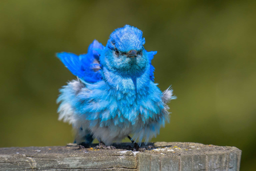

In [5]:
im = Image.open(dest)
im.to_thumb(256,256)

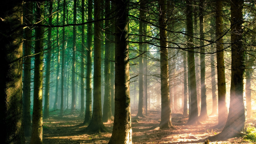

In [6]:
download_url(search_images_ddg('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [7]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#17) [None,None,None,None,None,None,None,None,None,None...]

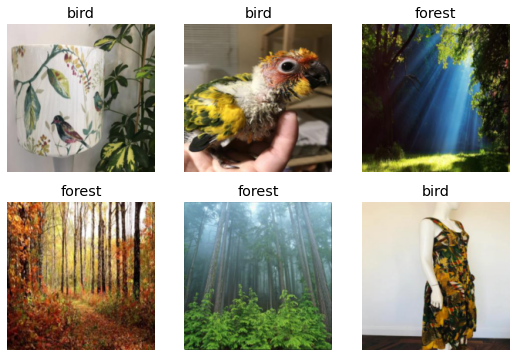

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.549349,0.150292,0.040000,02:25


epoch,train_loss,valid_loss,error_rate,time
0,0.200037,0.152691,0.040000,03:37
1,0.132766,0.125207,0.031111,03:34
2,0.095349,0.128807,0.031111,03:32


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpeg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [ ]:
is_forest,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_forest}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a forest: 0.0000
